# Data Exploration Tutorial Activity

In this initial tutorial, you will learn or be reminded of the ways to begin characterizing your dataset. This work is where much of the science happens - understanding what your data set looks like, what data it contains, what features of it connect with others, and what modeling processes might make the most sense for your data set.

After completing this tutorial you should be able to:

* Read a data set into a pandas dataframe
* Determine the size and shape of the data set
* Determine if any data are missing from the data set
* Plot the distribution (both raw and cumulative) of different variables in the data set
* Determine how well distributions of these data fit with known distributions (e.g., Gaussian)
* Characterize the relationships between different variables in your data set (i.e., do they covary?)
* Decide on a reasonable first model for your data set

By answering a series of questions below for a constructed data set, you will achieve these goals.

## 1. Reading in data and determining basic properties of the data set

When conducting analysis using Python, the `pandas` library is incredibly useful because it provides a common framework to work with data and simple tools for characterizing that data. We will use the `pandas` library for our work throughout the summer.

There is a data set in a csv file (`sample.csv`) in a folder called `data`. 

### Tasks and Questions
* Read the file into a pandas dataframe.
* What does this file contain? How many variables?
* What is the size of the data?

### Challenge:
* Determine if any data are missing from the dataset without looking at the data line-by-line.

__1. Solution__

Below we import some of the most commonly used libraries for this kind of analysis. 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

We read the file in using the `read_csv` method, which creates a dataframe. We also notice that someone kindly labelled the data as input and output, which should make decisions about the modeling easier. From looking at the first few entries using the `head` method, we find that they are 3 variables (one ouput variable and two input variables).

In [2]:
df = pd.read_csv('../data/sample.csv', 
                 sep = '\t')

df.head()

,output,input0,input1
0,135.099191,0.453641,1.136214
1,72.225026,0.499756,0.224330
2,-36.006911,0.189176,-0.382202
3,52.196707,0.456142,-0.098024
4,-96.906469,-1.008341,-0.464785


By using looking at the `shape` attribute, we find that the data set has 10000 entries for each of the three variables.

In [3]:
df.shape

(10000, 3)

We can use `isnull()` to determine if any of the data are missing, but this method returns a boolean for each value of the data set. To pool across all the data, we will check if any of the `values` are null using `.values.any()`. It turns out that no data are missing from this data set.

In [4]:
df.isnull().values.any()

False

## 2. Plotting the distributions of your data

For this data set, there are 10000 points in each of 3 variables. While not an enormous data set, it is still too much to look at individual elements (as we saw with checking if any of the data are missing). It will be valuable for both understanding the data set and for choosing how to model it later that we see how these data are distributed.

### Tasks and Questions

* Plot the distribution (a histogram) of each variable in the data set
    * Can you do this by only using pandas methods? What other ways could you use (if needed)?
* Plot the cumuluative distribution for each variable in the data set
    * Can you do this by only using pandas methods? What other ways could you use (if needed)?
* Do the distributions of these data look familiar? What distribution(s) might they fit most closely?

__2. Solution__

Using `pandas` this task is realtively straightforward. The distribution of all the variables can be viewed by simply using the `hist` method. However, it is worth showing that you can do this for a given variable, which also can use the `hist` method. In addition the `hist` method allows us to develop a cumulative distribution that we can norm.

As we can see, all of our data look relatively Gaussian, so we should be able to use the mean and standard deviation to build model distributions to compare them against. We will do that in the next task.

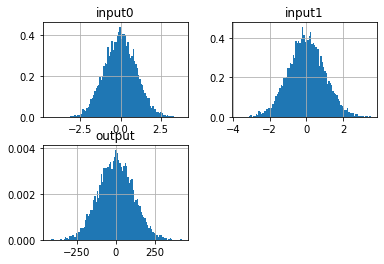

In [5]:
df.hist(bins = 100, density = 1);

Text(0.5, 0, 'output')

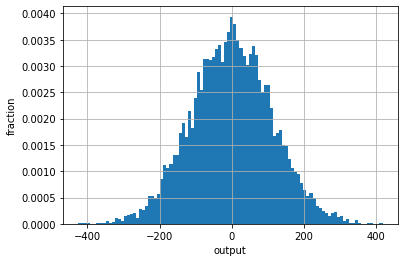

In [6]:
df['output'].hist(bins = 100, density = 1)

plt.ylabel('fraction')
plt.xlabel('output')

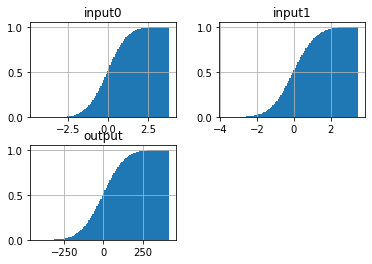

In [7]:
df.hist(cumulative=True, 
        density = 1,
        bins = 100);

Text(0.5, 0, 'output')

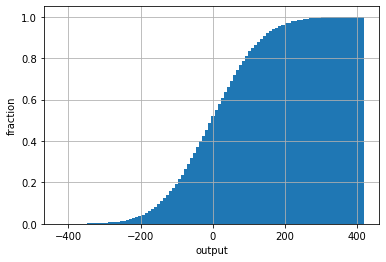

In [8]:
df['output'].hist(cumulative=True, 
        density = 1,
        bins = 100)

plt.ylabel('fraction')
plt.xlabel('output')

## 3. Characterizing how well your data fits known distributions

It was likely easy to see that these data for all 3 variables fit well (at least, visually) with a Gaussian distribution. Let's see if we can get a bit more quantitative with these data and see how well they fit a Gaussian distribution.

### Tasks and Questions

* Determine the mean and standard deviation for each of the variables in your data set.
* Use those values to build a Gaussian model of your data and plot that model along with your data.

### Challenge
* Look up a goodness-of-fit test for a Gaussian and determine how well the distribution of each variable fits with a Gaussian model.

__3. Solution__

We can use the `mean` and `std` methods to find these description of our data. Given that we think our data appears Gaussian, we can construct a Gaussian function with using the means and standard deviations and plot them (normalized) on top of each other.

In [9]:
means =  df.mean()
std_devs = df.std()

print("means:\n", means, "\n")
print("standard deviations:\n", std_devs)

means:
 output   -0.364299
input0   -0.010486
input1    0.003041
dtype: float64 

standard deviations:
 output    111.851802
input0      0.994969
input1      0.985901
dtype: float64


In [10]:
def compareToGaussian(variable, step = 1):
    
    mu, sigma = means[variable], std_devs[variable]
    x = np.arange(df[variable].min()-0.1*df[variable].min(), df[variable].max()+0.1*df[variable].max(), step)

    gauss = 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(0.5*((x-mu)/sigma))**2)

    plt.plot(x,gauss)
    df[variable].hist(bins = 100, density = 1)
    plt.ylabel('fraction')
    plt.xlabel(variable)

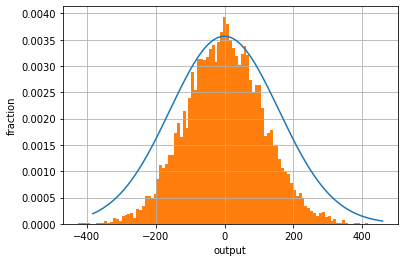

In [11]:
compareToGaussian('output')

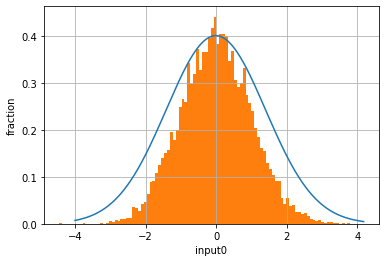

In [12]:
compareToGaussian('input0', 0.01)

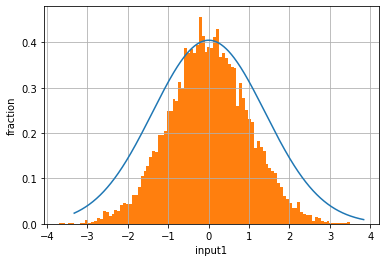

In [13]:
compareToGaussian('input1', 0.01)

We can use the Shapiro-Wilk test within `scipy.stats` to check if the data were drawn from a Gaussian distribution. It looks like the test confirms what we could tell by eye.

In [ ]:
from scipy.stats import shapiro

def normTest(data):
    
    stat, p = shapiro(data)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

In [ ]:
normTest(df['output'])

In [ ]:
normTest(df['input0'])

In [ ]:
normTest(df['input1'])

## 4. Determining how the data are related to each other

As we are ultimately interested in building models of data, we'd like to know how the variables are related to each other. There's a few ways we can do that, which we can introduce here.

### Tasks and Questions

* Make a scatter plot of each variable against the others.
    * Do they co-vary? If the do, how so?
    * Do you see "interaction effects" in your input variables?
* Quantify any covariance you see between variables.

__4. Solution__

Using the `plot.scatter()` method, we can see that there might be some sort of linerar relationship between the input variables and the output variable. It appears that the relationship is stronger between `input1` and `output`. It also appears there's really no relationship between the input variables (i.e., little, if any, interaction effect). We can check that using the `corr()` method.

In [ ]:
ax1 = df.plot.scatter(x = 'input0',
                      y = 'output')

In [ ]:
ax1 = df.plot.scatter(x = 'input1',
                      y = 'output')

In [ ]:
ax1 = df.plot.scatter(x = 'input0',
                      y = 'input1')

In [ ]:
print(df.corr())

From this analysis, it appears that a linear regression model that uses `input0` and `input1` to predict `output` is reasonable. We don't need to include interaction effects.